## NWB data exploration (Calcium imaging)

This notebook is used to try out working with calcium imaging data from NWB 2.0 files

About Neurodata Without Borders (NWB): https://www.nwb.org/

Paper:
```
Farzaneh Najafi, Gamaleldin F Elsayed, Robin Cao, Eftychios Pnevmatikakis, Peter E Latham, John Cunningham, Anne K Churchland. "Excitatory and inhibitory subnetworks are equally selective during decision-making and emerge simultaneously during learning" bioRxiv (2018): 354340.
```

Data: https://repository.cshl.edu/id/eprint/37693/

In [1]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import h5py
from pynwb import NWBFile, NWBHDF5IO

## Using h5py to explore the data:

In [2]:
def print_group(obj, key, sep=''):
    print(sep,'-',key,':',obj[key])

    
def print_dataset(obj, key, sep=''):
    print(sep+'\t','-',key,':',obj.attrs[key])
        

def process_hdf5_file(obj,
                      sep='',
                      func_group=print_group,
                      func_dataset=print_dataset,
                      leave_out_groups = [],
                      ):
    """
    Iterate through groups in an HDF5 file and process groups and datasets.
    Skips processing any groups that are specified in leave_out_groups.
    Default behaviour: prints the names of all groups and datasets & prints the attributes of datasets
    """
    if type(obj) in [h5py._hl.group.Group,h5py._hl.files.File]:
        for key in obj.keys():
            func_group(obj,key,sep)
            # Descend into the lower-level group if desirable
            if key not in leave_out_groups:
                process_hdf5_file(obj[key],
                                  sep=sep+'\t',
                                  leave_out_groups=leave_out_groups,
                                  )

    elif type(obj)==h5py._hl.dataset.Dataset:
        for key in obj.attrs.keys():
            func_dataset(obj,key,sep)
    

In [3]:
# Specify data path and filename
data_dir = 'data'
fname = 'mouse1_fni16_150818_001_ch2-PnevPanResults-170808-180842.nwb'
filename = os.path.join(data_dir, fname)

In [4]:
# Explore the dataset

import h5py
filename = "data/mouse1_fni16_150818_001_ch2-PnevPanResults-170808-180842.nwb"

with h5py.File(filename, "r") as f:
    print("This calcium imaging dataset has the following data structure:\n")    
    # Use process_hdf5_file() w to print out structure
    process_hdf5_file(f, leave_out_groups=['Trial-based-Segmentation', 
                                     'Image-Segmentation',
                                     'Behavior',
                                     'trials',
                                    ])

This calcium imaging dataset has the following data structure:

 - acquisition : <HDF5 group "/acquisition" (0 members)>
 - analysis : <HDF5 group "/analysis" (0 members)>
 - file_create_date : <HDF5 dataset "file_create_date": shape (1,), type "|O">
 - general : <HDF5 group "/general" (7 members)>
	 - devices : <HDF5 group "/general/devices" (1 members)>
		 - img_device : <HDF5 group "/general/devices/img_device" (0 members)>
	 - experimenter : <HDF5 dataset "experimenter": shape (), type "|O">
	 - institution : <HDF5 dataset "institution": shape (), type "|O">
	 - optophysiology : <HDF5 group "/general/optophysiology" (1 members)>
		 - img_pln : <HDF5 group "/general/optophysiology/img_pln" (7 members)>
			 - Green : <HDF5 group "/general/optophysiology/img_pln/Green" (2 members)>
				 - description : <HDF5 dataset "description": shape (), type "|O">
				 - emission_lambda : <HDF5 dataset "emission_lambda": shape (), type "<f8">
			 - description : <HDF5 dataset "description": shape 

In [5]:
# Explore the Trial-based-Segmentation dataset

import h5py
filename = "data/mouse1_fni16_150818_001_ch2-PnevPanResults-170808-180842.nwb"

with h5py.File(filename, "r") as f:
    print("This calcium imaging dataset has the following data structure:\n")    
    # Use process_hdf5_file() to print out structure
    process_hdf5_file(f, leave_out_groups=['general',
                                           'identifier',
                                           'intervals',
                                           'Behavior',
                                           'Image-Segmentation',
                                           'trials',
                                           'stimulus',
                                          ])

This calcium imaging dataset has the following data structure:

 - acquisition : <HDF5 group "/acquisition" (0 members)>
 - analysis : <HDF5 group "/analysis" (0 members)>
 - file_create_date : <HDF5 dataset "file_create_date": shape (1,), type "|O">
 - general : <HDF5 group "/general" (7 members)>
 - identifier : <HDF5 dataset "identifier": shape (), type "|O">
 - intervals : <HDF5 group "/intervals" (1 members)>
 - processing : <HDF5 group "/processing" (3 members)>
	 - Behavior : <HDF5 group "/processing/Behavior" (1 members)>
	 - Image-Segmentation : <HDF5 group "/processing/Image-Segmentation" (1 members)>
	 - Trial-based-Segmentation : <HDF5 group "/processing/Trial-based-Segmentation" (9 members)>
		 - dFoF_commitIncorrAl : <HDF5 group "/processing/Trial-based-Segmentation/dFoF_commitIncorrAl" (56 members)>
			 - Trial_00 : <HDF5 group "/processing/Trial-based-Segmentation/dFoF_commitIncorrAl/Trial_00" (3 members)>
				 - data : <HDF5 dataset "data": shape (385, 80), type "<f8">

In [6]:
# Explore the event types
with h5py.File(filename, "r") as f:
    # Print all event types
    for event in f['processing']['Trial-based-Segmentation']:
        print(event)

dFoF_commitIncorrAl
dFoF_firstSideTryAl
dFoF_firstSideTryAl_COM
dFoF_goToneAl
dFoF_initToneAl
dFoF_rewardAl
dFoF_stimAl_allTrs
dFoF_stimAl_noEarlyDec
dFoF_stimOffAl


In [7]:
# Explore data for a given event
with h5py.File(filename, "r") as f:
    for trial in f['processing']['Trial-based-Segmentation']['dFoF_commitIncorrAl']:
        print(list(f['processing']['Trial-based-Segmentation']['dFoF_commitIncorrAl'][trial]))
#         print(list(f['processing']['Trial-based-Segmentation']['dFoF_commitIncorrAl'][trial]['data'])) # only gives NaNs
        print(list(f['processing']['Trial-based-Segmentation']['dFoF_commitIncorrAl'][trial]['rois']))
        print(list(f['processing']['Trial-based-Segmentation']['dFoF_commitIncorrAl'][trial]['timestamps']))
        break

['data', 'rois', 'timestamps']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 

In [8]:
with h5py.File(filename, "r") as f:
    trials = f['processing']['Trial-based-Segmentation']['dFoF_commitIncorrAl']
    for trial in trials:
        timestamps = np.array(trials[trial]['timestamps'])
        pre_stim_duration = np.maximum(timestamps[0], -10000)
        post_stim_duration = np.minimum(timestamps[-1], 100)   
        # extract data
        indices = np.logical_and(timestamps >= pre_stim_duration, timestamps <= post_stim_duration)
        print(np.dstack((trials[trial]['data'][:, indices])),timestamps[indices])
        break
        

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]] [-1100.3236246  -1067.96116505 -1035.5987055  -1003.23624595
  -970.87378641  -938.51132686  -906.14886731  -873.78640777
  -841.42394822  -809.06148867  -776.69902913  -744.33656958
  -711.97411003  -679.61165049  -647.24919094  -614.88673139
  -582.52427184  -550.1618123   -517.79935275  -485.4368932
  -453.07443366  -420.71197411  -388.34951456  -355.98705502
  -323.62459547  -291.26213592  -258.89967638  -226.53721683
  -194.17475728  -161.81229773  -129.44983819   -97.08737864
   -64.72491909   -32.36245955     0.            32.36245955
    64.72491909    97.08737864]


## Switching to pynwb (a nice library to parse NWB files):

In [9]:
# Open the data using pynwb for easier data handling
nwb_io = NWBHDF5IO(filename, mode = 'r')
nwbfile = nwb_io.read()
trial_based_segmentation = nwbfile.modules.get('Trial-based-Segmentation').data_interfaces

In [10]:
def get_trialsegmented_roi_timeseries(event,
                                      pre_stim_duration,
                                      post_stim_duration,
                                      trial_based_segmentation):
    timeseries = trial_based_segmentation.get(event).roi_response_series
    timestamps = timeseries.get('Trial_00').timestamps.value
    pre_stim_duration = np.maximum(timestamps[0], pre_stim_duration)
    post_stim_duration = np.minimum(timestamps[-1], post_stim_duration)   
    # extract data
    indices = np.logical_and(timestamps >= pre_stim_duration, timestamps <= post_stim_duration)
    return (np.dstack((data.data.value[:, indices] for data in timeseries.values())), 
            timestamps[indices])

In [11]:
# Extract trial-based data and average over trial
def average_over_trials(segmentation_settings,
                        trial_based_segmentation):
    trial_avg = {}
    for setting in segmentation_settings:
        # extract segment
        segments  = get_trialsegmented_roi_timeseries(setting['event'],
                                                      setting['pre'],
                                                      setting['post'],
                                                      trial_based_segmentation)
        # average over trial
        trial_avg[setting['event']] = (np.nanmean(segments[0], axis=2), segments[1])
    return trial_avg

In [12]:
# Function to sort the ROI time-series based on the latency of the peak activity
def sort_roi_by_peak_latency(roi_timeseries):
    sorted_roi_idx = np.argsort(np.argmax(roi_timeseries, axis = 1))
    return (roi_timeseries[sorted_roi_idx,:].copy(),
            sorted_roi_idx)

In [13]:
# Define what data to extract

"""
event = eventtype
pre = cutoff time in ms before event
post = amount of ms after event
"""

# settings to select events: start tone, stimulus, 1st commit and 2nd commit
segmentation_settings = [
    {'event':'dFoF_initToneAl', 'pre': -10000, 'post': 100},
    {'event':'dFoF_stimAl_noEarlyDec', 'pre': -100, 'post': 10000},
    {'event':'dFoF_firstSideTryAl', 'pre': -250, 'post': 250},
    {'event':'dFoF_rewardAl', 'pre': -250, 'post': 10000},
    ]

### Extract & Transform data

In [14]:
# Sort and concatenate trial-based data time-locked to selected events
trial_avg = average_over_trials(segmentation_settings, trial_based_segmentation)

# Concatenate and sort
stacked_timeseries = np.hstack((value[0] for value in trial_avg.values()))
stacked_timeseries, sorted_roi_idx = sort_roi_by_peak_latency(stacked_timeseries)

# Concatenate all timestamps
timestamps_concat = [timestamps for (timeseries, timestamps) in trial_avg.values()]
timestamps_per_neuron = [t.size for t in timestamps_concat]
timestamps_per_neuron.insert(0,0)
# Determine the indices of t = 0
zeros_all = [np.where(timestamp == 0)[0][0] for timestamp in timestamps_concat]

# Obtain the ROI-table
# here, 'initToneAl' is selected arbitrarily, all of the roi_response_series contain the same ROI-table and roi_status-es
roi_timeseries = trial_based_segmentation.get('dFoF_initToneAl').roi_response_series.get('Trial_00')  
roi_status_good = roi_timeseries.rois.data  # roi_status_good refers a 1D array of ROI indices, indexing into the ROI-table
roi_table = roi_timeseries.rois.table

# Extract inh/exc status
neuron_type = roi_table.get('neuron_type').data[roi_status_good]
is_inh = np.zeros((stacked_timeseries.shape[0]))
is_inh[neuron_type[sorted_roi_idx] == 'inhibitory'] = 1

/home/nils/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/home/nils/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/home/nils/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/home/nils/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an erro

#### Use the ROI-table to extract wheteher each neuron is Excitatory or Inhibitory

In [15]:
# Obtain the ROI-table
# here, 'initToneAl' is selected arbitrarily, all of the roi_response_series contain the same ROI-table and roi_status-es
roi_timeseries = trial_based_segmentation.get('dFoF_initToneAl').roi_response_series.get('Trial_00')  
roi_status_good = roi_timeseries.rois.data  # roi_status_good refers a 1D array of ROI indices, indexing into the ROI-table
roi_table = roi_timeseries.rois.table

# Visualizing the ROI-table 
roi_colums = roi_table.colnames
roi_table_df = {}
for c in roi_colums:
    if c == 'image_mask':
        continue
    roi_table_df[c] = roi_table.get(c).data if type(roi_table.get(c).data) is np.ndarray else roi_table.get(c).data.value
roi_table_df = pd.DataFrame(roi_table_df)

/home/nils/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  del sys.path[0]


In [16]:
# A summary of the table:
roi_table_df

,roi_id,roi_status,neuron_type,fitness,roi2surr_sig,offsets_ch1_pix
0,0,good,excitatory,-inf,0,-190
1,54,good,excitatory,-inf,0,503
2,28,good,inhibitory,-inf,3,14081
3,29,good,excitatory,-inf,0,2124
4,30,good,excitatory,-inf,0,2707
...,...,...,...,...,...,...
704,522,bad,unknown,-9.540726,-9223372036854775808,-9223372036854775808
705,518,bad,unknown,-8.617212,-9223372036854775808,-9223372036854775808
706,350,bad,unknown,-8.284486,-9223372036854775808,-9223372036854775808
707,403,bad,unknown,-10.431761,-9223372036854775808,-9223372036854775808


In [17]:
# Extract inh/exc status
neuron_type = roi_table.get('neuron_type').data[roi_status_good]
is_inh = np.zeros((stacked_timeseries.shape[0]))
is_inh[neuron_type[sorted_roi_idx] == 'inhibitory'] = 1

NameError: name 'time' is not defined

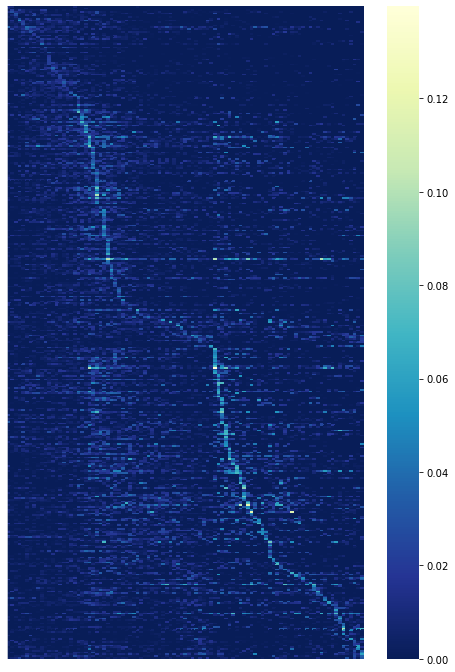

In [18]:
# Raster Plot - recreating Figure 1E from the paper
fig1E = plt.figure(figsize=(8,12))
ax1 = fig1E.add_subplot(111)
ax1.set_facecolor('white')

sns.heatmap(data=stacked_timeseries,
            xticklabels=[], yticklabels=[], cmap='YlGnBu_r', axes=ax1, vmin=0)

# add vertical lines
for z_index, z in enumerate(zeros_all):
    ax1.axvline(x=np.cumsum(timestamps_per_neuron)[z_index], color='w',linestyle='-',linewidth=0.7)
    ax1.axvline(x=z + np.cumsum(time)[z_index], color='r',linestyle='--',linewidth=1)
    
# add inhibitor marker
ax1.plot(np.ones(is_inh.shape)*(data_all.shape[1]+5), np.arange(is_inh.size)*is_inh, 'r_', markersize=8)

ax1.set_xlim(0, data_all.shape[1]+10)
ax1.set_xlabel('Time')
ax1.set_ylabel('Neuron')
ax1.set_label('Averaged infered spike for all neurons for an example session')

## Using the data in Pandas:

In [ ]:
# Extracting the data (segmented by trial)
dataset = []

with h5py.File(filename, "r") as f:
    for session in f['processing']['Trial-based-Segmentation']:
        for trial in f['processing']['Trial-based-Segmentation'][session]:
                dataset.append([list(f['processing']['Trial-based-Segmentation'][session][trial]['data']),
                                list(f['processing']['Trial-based-Segmentation'][session][trial]['rois']),
                                list(f['processing']['Trial-based-Segmentation'][session][trial]['timestamps'])])
    df = pd.DataFrame(dataset, columns = ['data', 'rois', 'timestamps'])            

In [ ]:
# Exploring the data
print("shape:")
df.shape

In [31]:
print("first dimension:")
df.head()

first dimension:


,data,rois,timestamps
0,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-1100.3236245954695, -1067.9611650485438, -10..."
1,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-1100.3236245954695, -1067.9611650485438, -10..."
2,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-1100.3236245954695, -1067.9611650485438, -10..."
3,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-1100.3236245954695, -1067.9611650485438, -10..."
4,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-1100.3236245954695, -1067.9611650485438, -10..."


In [39]:
df.columns

Index(['data', 'rois', 'timestamps'], dtype='object')